In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [3]:
!pip install yfinance

  Using cached yfinance-0.2.55-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.9.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached beautifulsoup4-4.13.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached yfinance-0.2.55-py2.py3-none-any.whl (109 kB)
Using cached beautifulsoup4-4.13.3-py3-none-any.whl (186 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=eaa18fc417c3cb37eaedf4656bb9441

In [4]:
import yfinance as yf

# Get USD/EUR data (EURUSD=X)
eur_usd = yf.download("EURUSD=X", start="2000-01-01", end="2025-01-01")

# Get USD/INR data (INR=X)
usd_inr = yf.download("INR=X", start="2000-01-01", end="2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
## inverting to get EUR/USD
eur_usd['Close'] = 1/eur_usd['Close']
eur_usd['High'] = 1/eur_usd['High']
eur_usd['Low'] = 1/eur_usd['Low']
eur_usd['Open'] = 1/eur_usd['Open']

eur_usd.to_csv("./Raw Data/usd_eur_forex.csv")
usd_inr.to_csv("./Raw Data/usd_inr_forex.csv")
print("Data saved successfully")


Data saved successfully


In [6]:
usd_eur = pd.read_csv("./Raw Data/usd_eur_forex.csv",index_col='Date',parse_dates=True)
usd_inr = pd.read_csv("./Raw Data/usd_inr_forex.csv",index_col='Date',parse_dates=True)
usd_eur.head()


,Close,High,Low,Open,Volume
Date,,,,,
2003-12-01,0.83577,0.83056,0.83724,0.83098,0
2003-12-02,0.82720,0.82583,0.83710,0.83605,0
2003-12-03,0.82488,0.82440,0.82802,0.82713,0
2003-12-04,0.82775,0.82345,0.83029,0.82508,0
2003-12-05,0.82055,0.82028,0.82878,0.82795,0


In [ ]:
#usd_eur.drop([0,1],inplace=True)
#usd_inr.drop([0,1],inplace=True)
#usd_eur.head()

In [ ]:
#usd_eur.rename(columns={'Price':'Date'},inplace=True)
#usd_inr.rename(columns={'Price':'Date'},inplace=True)
#usd_eur.head()

In [ ]:
#usd_eur.info()

In [ ]:
##usd_eur = usd_eur.set_index(pd.to_datetime(usd_eur["Date"]))
#usd_eur.drop(columns=['Date'],inplace=True)
#usd_eur.head()

In [ ]:
#usd_inr = usd_inr.set_index(pd.to_datetime(usd_inr["Date"]))
#usd_inr.drop(columns=['Date'],inplace=True)
#usd_inr.head()

In [7]:

print("USD/EUR Data:")
print(usd_eur.head())
print("\n USD/INR Data :")
print(usd_inr.head())

USD/EUR Data:
              Close     High      Low     Open  Volume
Date                                                  
2003-12-01  0.83577  0.83056  0.83724  0.83098       0
2003-12-02  0.82720  0.82583  0.83710  0.83605       0
2003-12-03  0.82488  0.82440  0.82802  0.82713       0
2003-12-04  0.82775  0.82345  0.83029  0.82508       0
2003-12-05  0.82055  0.82028  0.82878  0.82795       0

 USD/INR Data :
                Close       High        Low       Open  Volume
Date                                                          
2003-12-01  45.709999  45.728001  45.615002  45.709000       0
2003-12-02  45.629002  45.719002  45.560001  45.709000       0
2003-12-03  45.549999  45.655998  45.474998  45.632000       0
2003-12-04  45.548000  45.612999  45.519001  45.548000       0
2003-12-05  45.449001  45.566002  45.449001  45.549999       0


## Basic Statistics


In [8]:
print("USD/EUR summary stats :")
print(usd_eur.describe())

print("\nUSD/INR summary stats :")

print(usd_inr.describe())

USD/EUR summary stats :
             Close         High          Low         Open  Volume
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.0
mean      0.822080     0.819126     0.827608     0.822096     0.0
std       0.083467     0.083353     0.193370     0.083473     0.0
min       0.625470     0.623900     0.629960     0.625710     0.0
25%       0.754890     0.751868     0.758200     0.754980     0.0
50%       0.822770     0.820340     0.826160     0.822710     0.0
75%       0.894580     0.891870     0.897827     0.894600     0.0
max       1.042080     1.034120    13.717000     1.042080     0.0

USD/INR summary stats :
             Close         High          Low         Open  Volume
count  5470.000000  5470.000000  5470.000000  5470.000000  5470.0
mean     60.055872    60.252435    59.874918    60.054572     0.0
std      13.894931    13.900044    13.850217    13.885135     0.0
min      39.044998    39.235001    38.979000    38.995998     0.0
25%      45.767249    45.88

In [9]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5470 entries, 2003-12-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5470 non-null   float64
 1   High    5470 non-null   float64
 2   Low     5470 non-null   float64
 3   Open    5470 non-null   float64
 4   Volume  5470 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 256.4 KB


In [10]:
usd_eur.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5473 entries, 2003-12-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5473 non-null   float64
 1   High    5473 non-null   float64
 2   Low     5473 non-null   float64
 3   Open    5473 non-null   float64
 4   Volume  5473 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 256.5 KB


#### finding missing values

In [11]:
print("USD/EUR dataset missing values :")
print(usd_eur.isnull().sum())

print("\nUSD/INR dataset missing values :")

print(usd_inr.isnull().sum())

USD/EUR dataset missing values :
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

USD/INR dataset missing values :
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


No missing values in our dataset

## Time Series Plot

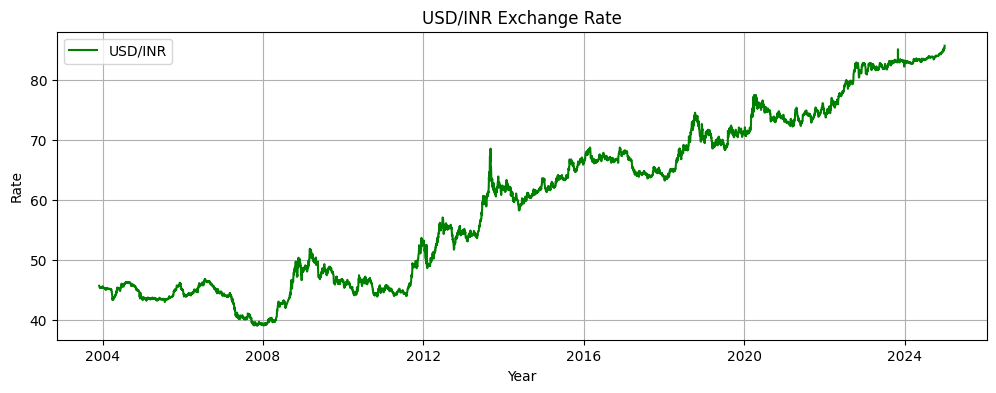

In [12]:
# Plot USD/INR alone
plt.figure(figsize=(12, 4))
plt.plot(usd_inr.index, usd_inr["Close"], color="green", label="USD/INR")
plt.title("USD/INR Exchange Rate")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

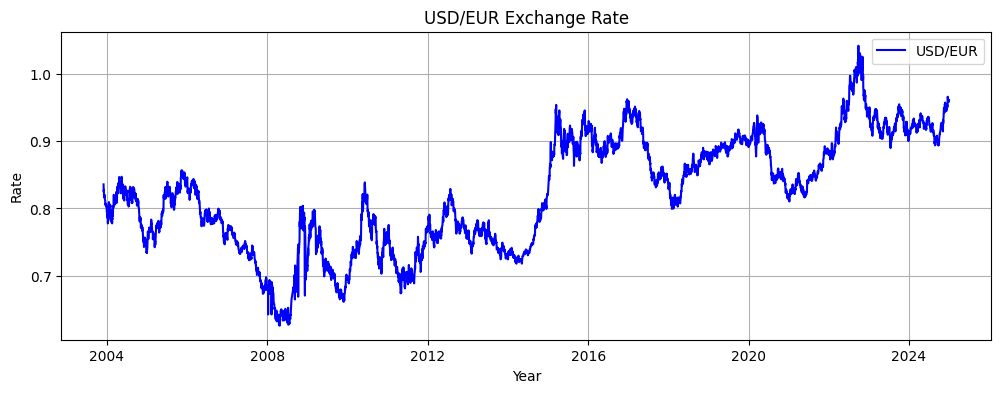

In [13]:
plt.figure(figsize=(12,4))
plt.plot(usd_eur['Close'],label='USD/EUR',color="blue")
plt.title("USD/EUR Exchange Rate")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

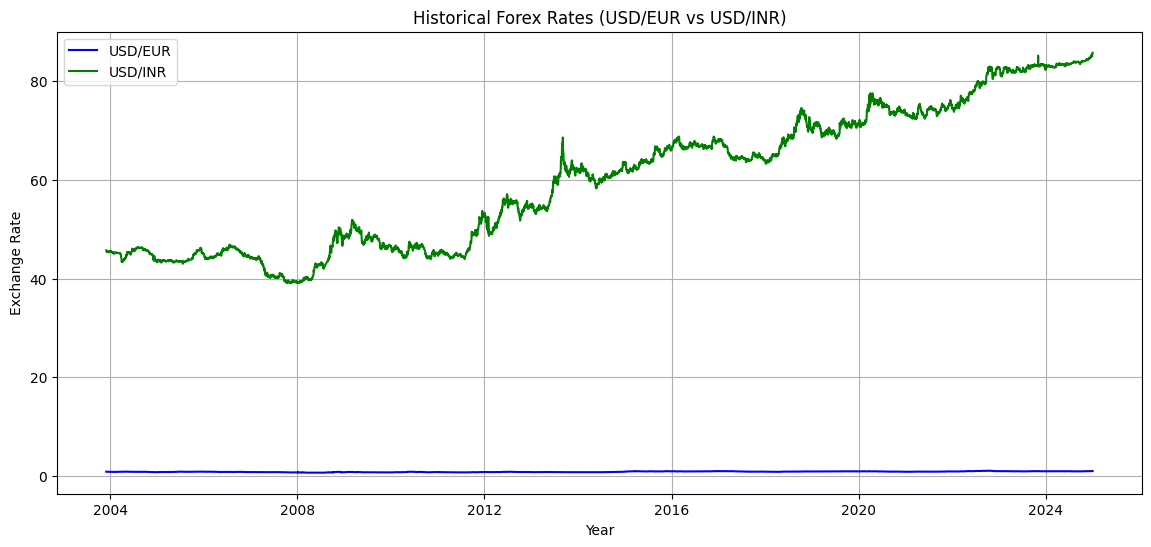

In [14]:
plt.figure(figsize=(14,6))
plt.plot(usd_eur['Close'],label='USD/EUR',color="blue")
plt.plot(usd_inr['Close'],label = "USD/INR",color = "green")
plt.title("Historical Forex Rates (USD/EUR vs USD/INR)")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.xticks()
plt.legend()
plt.grid()

plt.show()

The USD/INR exchange rate is much greater than USD/EUR rate so let's normalize it to view the actual trend


Let's Take the moving average of the data so as to smoothen the trend

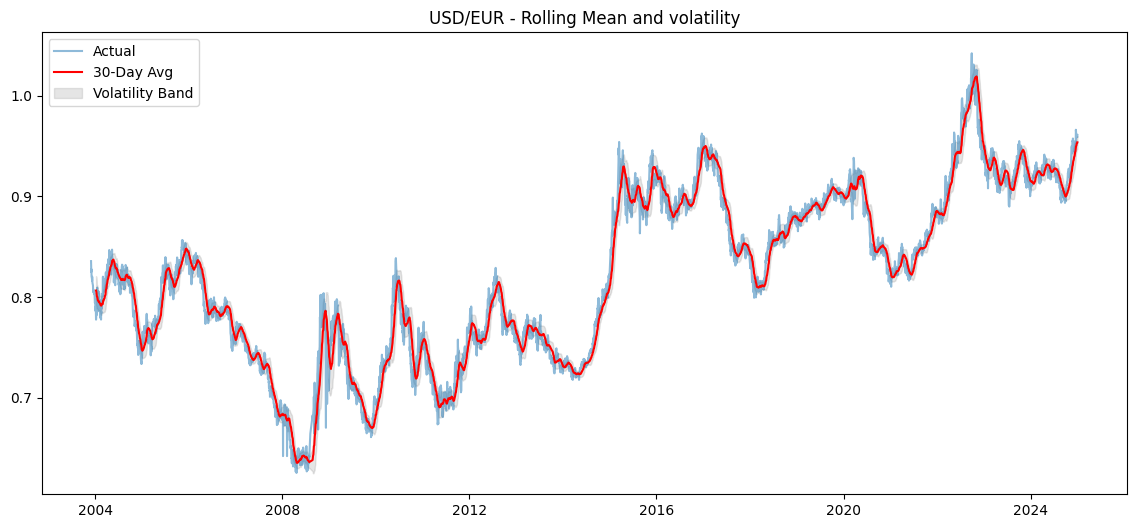

In [15]:
usd_eur['30_day_avg'] = usd_eur['Close'].rolling(window=30).mean()
usd_inr['30_day_avg'] = usd_inr['Close'].rolling(window=30).mean()
usd_eur['30_day_std'] = usd_eur['Close'].rolling(window=30).std()
usd_inr['30_day_std'] = usd_inr['Close'].rolling(window=30).std()
plt.figure(figsize=(14,6))
plt.plot(usd_eur["Close"],label="Actual",alpha=0.5)
plt.plot(usd_eur['30_day_avg'],label = '30-Day Avg',color='red')
plt.fill_between(
    usd_eur.index,
    usd_eur['30_day_avg']-usd_eur['30_day_std'],
    usd_eur['30_day_avg']+usd_eur['30_day_std'],
    alpha=0.2,
    color='gray',
    label='Volatility Band'
)
plt.title("USD/EUR - Rolling Mean and volatility")
plt.legend()
plt.show()


In [16]:
usd_eur.index = pd.to_datetime(usd_eur.index,format="%d-%m-%Y")

In [17]:
eur_2008 = usd_eur[(usd_eur.index >= '2008-01-01')&(usd_eur.index <= '2008-12-31')]
eur_2008.tail()

,Close,High,Low,Open,Volume,30_day_avg,30_day_std
Date,,,,,,,
2008-12-25,0.71352,0.70721,0.71510,0.71393,0,0.757183,0.038206
2008-12-26,0.71291,0.70857,0.71455,0.71347,0,0.754485,0.038386
2008-12-29,0.71230,0.69638,0.71813,0.70892,0,0.751866,0.038497
2008-12-30,0.70721,0.70323,0.71418,0.71248,0,0.749062,0.038587
2008-12-31,0.71531,0.70696,0.72176,0.70741,0,0.746250,0.037839


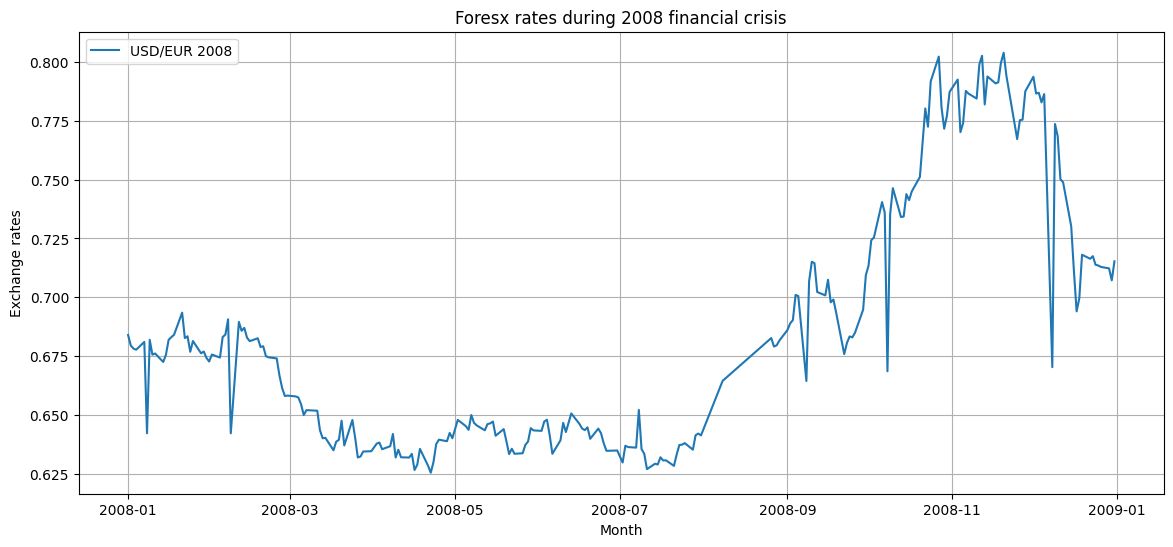

In [18]:
plt.figure(figsize=(14,6))
plt.plot(eur_2008.index,eur_2008['Close'],label='USD/EUR 2008')
plt.title("Foresx rates during 2008 financial crisis")
plt.xlabel("Month")
plt.ylabel("Exchange rates")
plt.legend()
plt.grid()
plt.show()

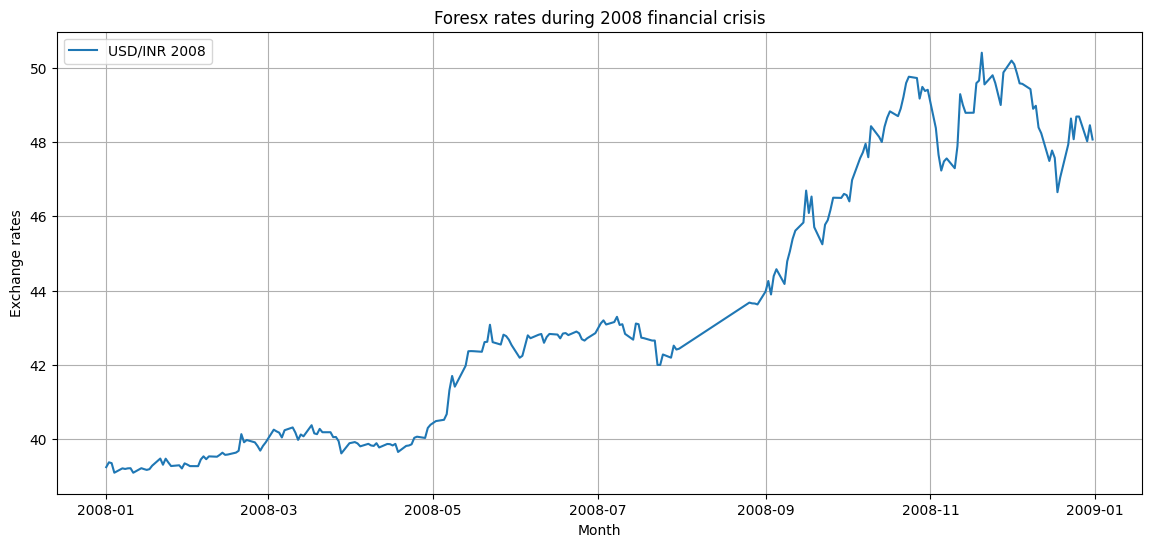

In [19]:
usd_inr.index = pd.to_datetime(usd_inr.index,format="%d-%m-%Y")
inr_2008 = usd_inr[(usd_inr.index >= '2008-01-01')&(usd_inr.index<='2008-12-31')]
plt.figure(figsize=(14,6))
plt.plot(inr_2008.index,inr_2008['Close'],label='USD/INR 2008')
plt.title("Foresx rates during 2008 financial crisis")
plt.xlabel("Month")
plt.ylabel("Exchange rates")
plt.legend()
plt.grid()
plt.show()

In [20]:
forex_merged = pd.merge(usd_eur['Close'],usd_inr['Close'],on="Date",suffixes=("_EUR","_INR"))
forex_merged.head()

,Close_EUR,Close_INR
Date,,
2003-12-01,0.83577,45.709999
2003-12-02,0.82720,45.629002
2003-12-03,0.82488,45.549999
2003-12-04,0.82775,45.548000
2003-12-05,0.82055,45.449001


In [21]:
corr = forex_merged.corr()
print("Correlation between usd_eur and usd_inr")
print(corr)

Correlation between usd_eur and usd_inr
           Close_EUR  Close_INR
Close_EUR   1.000000   0.807248
Close_INR   0.807248   1.000000


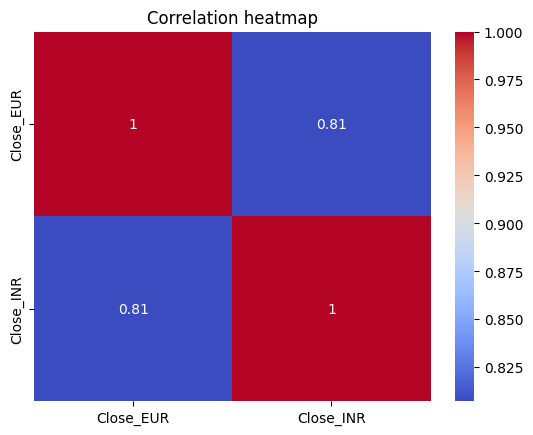

In [22]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [23]:
!pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.9 MB 13.7 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 13.1 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.9 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 11.8 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


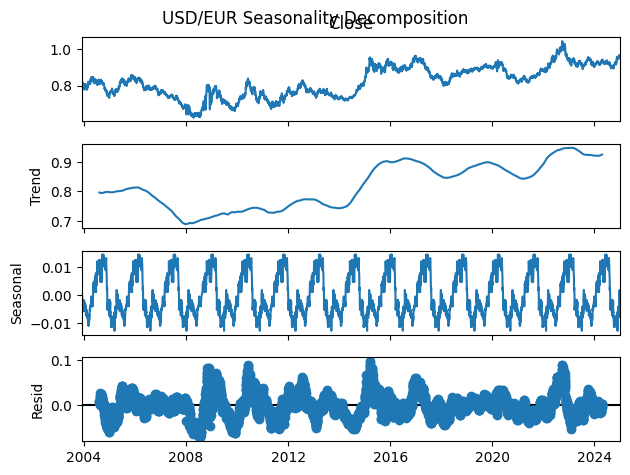

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose USD/EUR
decomposition = seasonal_decompose(usd_eur["Close"].dropna(), period=365)  # Yearly seasonality
decomposition.plot()
plt.suptitle("USD/EUR Seasonality Decomposition")
plt.show()

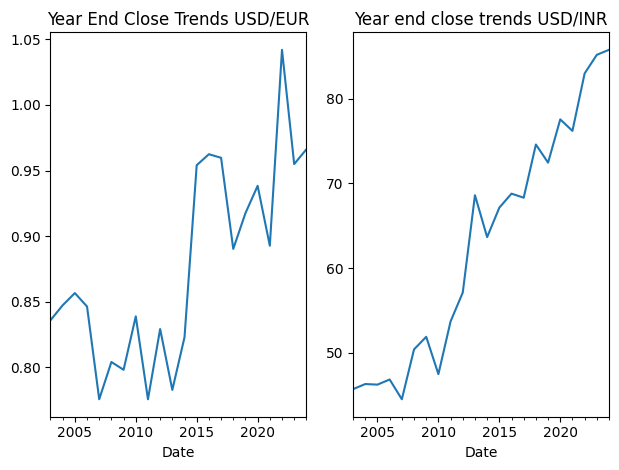

In [27]:

plt.subplot(1,2,1)
plt.tight_layout()
plt.title('Year End Close Trends USD/EUR')
forex_merged.resample(rule='A').max()['Close_EUR'].plot()

plt.subplot(1,2,2)
plt.tight_layout()
plt.title('Year end close trends USD/INR')
forex_merged.resample(rule='A').max()['Close_INR'].plot()
plt.show()

## Let's start with feature Engineering

In [28]:
df = usd_eur.copy()
df.head()


,Close,High,Low,Open,Volume,30_day_avg,30_day_std
Date,,,,,,,
2003-12-01,0.83577,0.83056,0.83724,0.83098,0,NaN,NaN
2003-12-02,0.82720,0.82583,0.83710,0.83605,0,NaN,NaN
2003-12-03,0.82488,0.82440,0.82802,0.82713,0,NaN,NaN
2003-12-04,0.82775,0.82345,0.83029,0.82508,0,NaN,NaN
2003-12-05,0.82055,0.82028,0.82878,0.82795,0,NaN,NaN


In [29]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_week'] = df.index.day_of_week

df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df.head()

,Close,High,Low,Open,Volume,30_day_avg,30_day_std,day,month,year,day_of_week,is_weekend
Date,,,,,,,,,,,,
2003-12-01,0.83577,0.83056,0.83724,0.83098,0,NaN,NaN,1,12,2003,0,0
2003-12-02,0.82720,0.82583,0.83710,0.83605,0,NaN,NaN,2,12,2003,1,0
2003-12-03,0.82488,0.82440,0.82802,0.82713,0,NaN,NaN,3,12,2003,2,0
2003-12-04,0.82775,0.82345,0.83029,0.82508,0,NaN,NaN,4,12,2003,3,0
2003-12-05,0.82055,0.82028,0.82878,0.82795,0,NaN,NaN,5,12,2003,4,0


# Adding lag features

In [30]:
df['lag_1'] = df['Close'].shift(1)
df['lag_7'] = df['Close'].shift(7)
df['lag_30'] = df['Close'].shift(30)
df.fillna(method='bfill',inplace=True)
df = df.drop(columns=['30_day_avg','30_day_std'])
df.head()

,Close,High,Low,Open,Volume,day,month,year,day_of_week,is_weekend,lag_1,lag_7,lag_30
Date,,,,,,,,,,,,,
2003-12-01,0.83577,0.83056,0.83724,0.83098,0,1,12,2003,0,0,0.83577,0.83577,0.83577
2003-12-02,0.82720,0.82583,0.83710,0.83605,0,2,12,2003,1,0,0.83577,0.83577,0.83577
2003-12-03,0.82488,0.82440,0.82802,0.82713,0,3,12,2003,2,0,0.82720,0.83577,0.83577
2003-12-04,0.82775,0.82345,0.83029,0.82508,0,4,12,2003,3,0,0.82488,0.83577,0.83577
2003-12-05,0.82055,0.82028,0.82878,0.82795,0,5,12,2003,4,0,0.82775,0.83577,0.83577


## Rolling window stats

In [31]:
df['rolling_mean_7'] = df['Close'].rolling(window=7).mean()
df['rolling_mean_30'] = df['Close'].rolling(window=30).mean()

df['rolling_std_7'] = df['Close'].rolling(window=7).std()
df['rolling_std_30'] = df['Close'].rolling(window=30).std()

df['upper_band'] = df['rolling_mean_30'] + (2*df['rolling_std_30'])
df['lower_band'] = df['rolling_mean_30'] - (2*df['rolling_std_30'])

# Technical Indicators

In [32]:
!pip install ta

  Using cached ta-0.11.0.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29496 sha256=b181f5f5ce1d629c9c6bcc9cec60091aee79d61894e7318870bff39f30b85e2a
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a1\d7\29\7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [33]:
from ta.trend import MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

df['rsi_14'] = RSIIndicator(df['Close'],window=14).rsi()
macd = MACD(df['Close'])
df['macd_line'] = macd.macd()
df['macd_signal'] = macd.macd_signal()

bb = BollingerBands(df['Close'])
df['bb_high'] = bb.bollinger_hband()
df['bb_low'] = bb.bollinger_lband()

df.head()

,Close,High,Low,Open,Volume,day,month,year,day_of_week,is_weekend,...,rolling_mean_30,rolling_std_7,rolling_std_30,upper_band,lower_band,rsi_14,macd_line,macd_signal,bb_high,bb_low
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-01,0.83577,0.83056,0.83724,0.83098,0,1,12,2003,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,0.82720,0.82583,0.83710,0.83605,0,2,12,2003,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-03,0.82488,0.82440,0.82802,0.82713,0,3,12,2003,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-04,0.82775,0.82345,0.83029,0.82508,0,4,12,2003,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-05,0.82055,0.82028,0.82878,0.82795,0,5,12,2003,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df['daily_return'] = df['Close'].pct_change()*100
df['log_return'] = np.log(df['Close']/df['Close'].shift(1))
df['price_diff'] = df['Close'].diff() # price difference from previous day

#### Let's create a target feataure for supervised learning

In [35]:
df['target'] = df['Close'].shift(-1)
df['target_direction'] = (df['Close'].shift(-1)>df['Close']).astype(int)

In [36]:
df.dropna(inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = df.drop(["target","target_direction"],axis=1,errors="ignore")
df_scaled = pd.DataFrame(scaler.fit_transform(features),columns = features.columns,index=df.index)
df_scaled['target'] = df['target']

In [47]:
df_scaled.shape

(5439, 28)

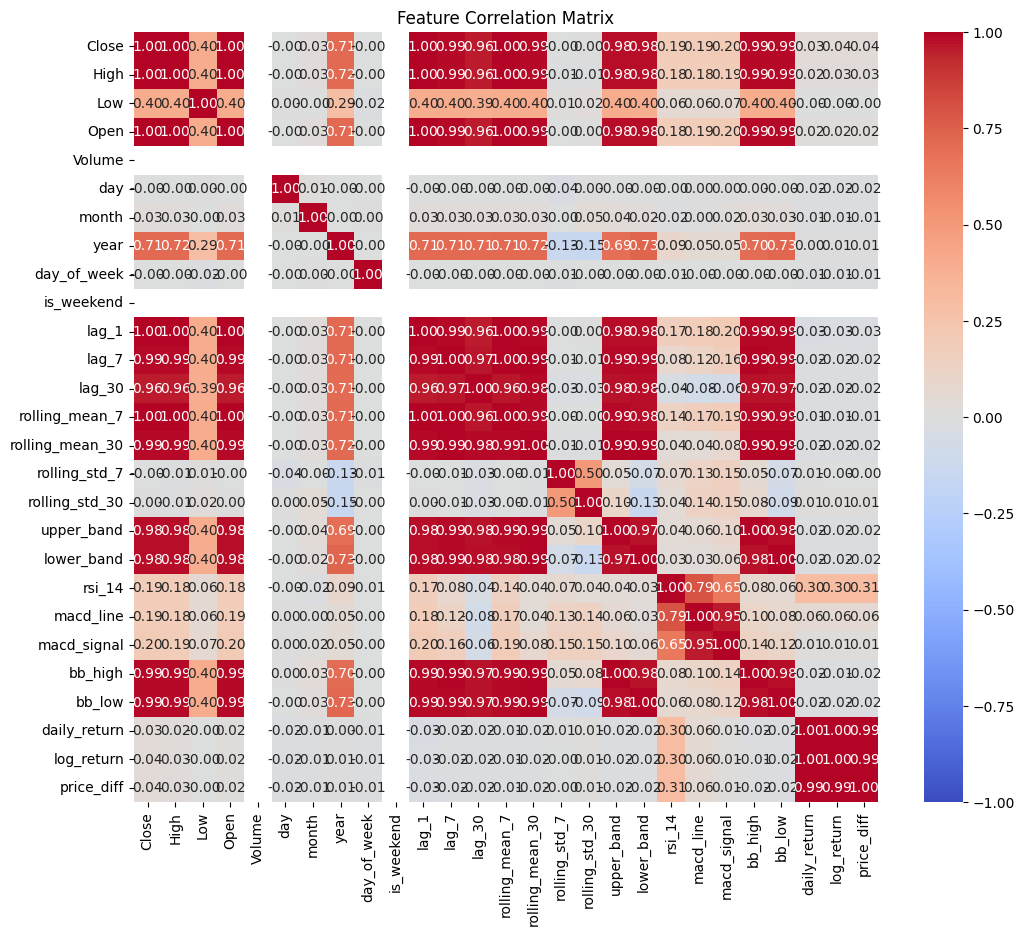

In [37]:
features = df_scaled.drop("target", axis=1, errors="ignore")

# Calculate correlation matrix
corr_matrix = features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

In [38]:
threshold = 0.85
high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

print(f"Features to remove (correlation > {threshold}): ")
print(high_corr)


Features to remove (correlation > 0.85): 
{'upper_band', 'bb_high', 'Open', 'lag_1', 'price_diff', 'bb_low', 'rolling_mean_7', 'lag_7', 'macd_signal', 'lower_band', 'lag_30', 'High', 'rolling_mean_30', 'log_return'}


In [39]:
!pip install mlxtend

  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)


In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

k_features = 15
sfs = SequentialFeatureSelector(
    LinearRegression(),
    k_features=k_features,
    forward = False,
    scoring = 'neg_mean_squared_error',
    cv = 5
)
sfs.fit(features,df_scaled['target'])
selected_features = list(sfs.k_feature_names_)
df_filtered = df_scaled[selected_features+['target']]

df_filtered.head()

,Close,High,Open,Volume,month,day_of_week,is_weekend,lag_1,lag_30,rolling_mean_30,rolling_std_7,upper_band,lower_band,daily_return,log_return,target
Date,,,,,,,,,,,,,,,,
2004-01-15,0.403543,0.402955,0.394913,0.0,0.0,0.75,0.0,0.396006,0.485538,0.431600,0.120020,0.446685,0.446674,0.502294,0.540001,0.80658
2004-01-16,0.434723,0.412267,0.403343,0.0,0.0,1.00,0.0,0.403543,0.468256,0.430386,0.208986,0.443013,0.448052,0.543390,0.580508,0.80945
2004-01-19,0.441612,0.441202,0.436126,0.0,0.0,0.00,0.0,0.434723,0.462927,0.429614,0.264173,0.440528,0.449081,0.500921,0.538639,0.79434
2004-01-20,0.405343,0.413485,0.441770,0.0,0.0,0.25,0.0,0.441612,0.458126,0.427704,0.222838,0.436913,0.449052,0.427241,0.464717,0.78995
2004-01-21,0.394806,0.403125,0.406225,0.0,0.0,0.50,0.0,0.405343,0.467608,0.425068,0.208407,0.431508,0.449437,0.470803,0.508622,0.78585


In [50]:
df_filtered.shape

(5439, 16)

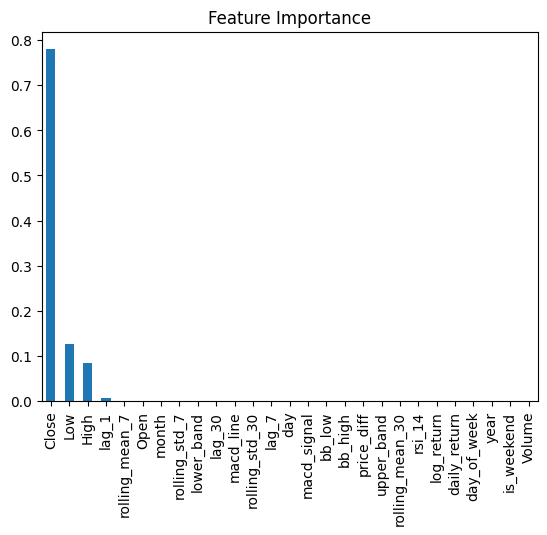

In [41]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(features, df_scaled["target"])
importance = pd.Series(model.feature_importances_, index=features.columns)
importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,MultiHeadAttention,LayerNormalization
from keras.optimizers import Adam

X = df_filtered.drop("target",axis=1).values

y = df_filtered["target"].values


In [51]:
len(X)

5439

In [62]:
y.shape

(5439,)

### we have to capture the temporal relationship for time series model so we reshape the seq to (samples,n_teps,features)

In [65]:
def create_sequence(X,y,n_steps):
    X_seq,y_seq = [],[]
    for i in range(len(X)-n_steps):
        X_seq.append(X[i:i+n_steps])
        y_seq.append(y[i+n_steps])
    return np.array(X_seq),np.array(y_seq)

n_steps = 7
X_seq,y_seq = create_sequence(X,y,n_steps)
X_train,X_test,y_train,y_test = train_test_split(X_seq,y_seq,test_size=0.2,shuffle=False)
print(f"Training shape : {X_train.shape}")
print(f"Test shape: {X_test.shape}")
print(f"Y shape: {y_test.shape}")

Training shape : (4345, 7, 15)
Test shape: (1087, 7, 15)
Y shape: (1087,)


In [66]:
model = Sequential([
    LSTM(64,activation='relu',input_shape=(n_steps,X_train.shape[2]),return_sequences=False),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dense(1)
])
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,593 (88.25 KB)

 Trainable params: 22,593 (88.25 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = model.fit(
    X_train,y_trainn,epochs=100,batch_size=32,validation_data = (X_test,y_test),verbose=1
)

Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1140 - mae: 0.2354 - val_loss: 6.3216e-04 - val_mae: 0.0215
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0056 - mae: 0.0590 - val_loss: 0.0023 - val_mae: 0.0469
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033 - mae: 0.0449 - val_loss: 0.0035 - val_mae: 0.0583
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021 - mae: 0.0360 - val_loss: 0.0064 - val_mae: 0.0795
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - mae: 0.0273 - val_loss: 0.0075 - val_mae: 0.0862
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010 - mae: 0.0241 - val_loss: 0.0094 - val_mae: 0.0965
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.1164e-04 - mae: 0.0197 - val_loss: 0.0080 - val_mae: 0.0891
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0183e-04 - mae: 0.0178 - val_loss: 0.0095 - val_mae: 0.0968
Epoch 9/100
136/136 ━━━━━━━━━━━━━━━━

In [69]:
y_pred = model.predict(X_test).flatten()
y_pred

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([0.79183555, 0.7960065 , 0.79915786, ..., 0.87758946, 0.8770771 ,
       0.8751342 ], dtype=float32)

In [71]:
print(y_test.shape)
print(y_pred.shape)

(1087,)
(1087,)


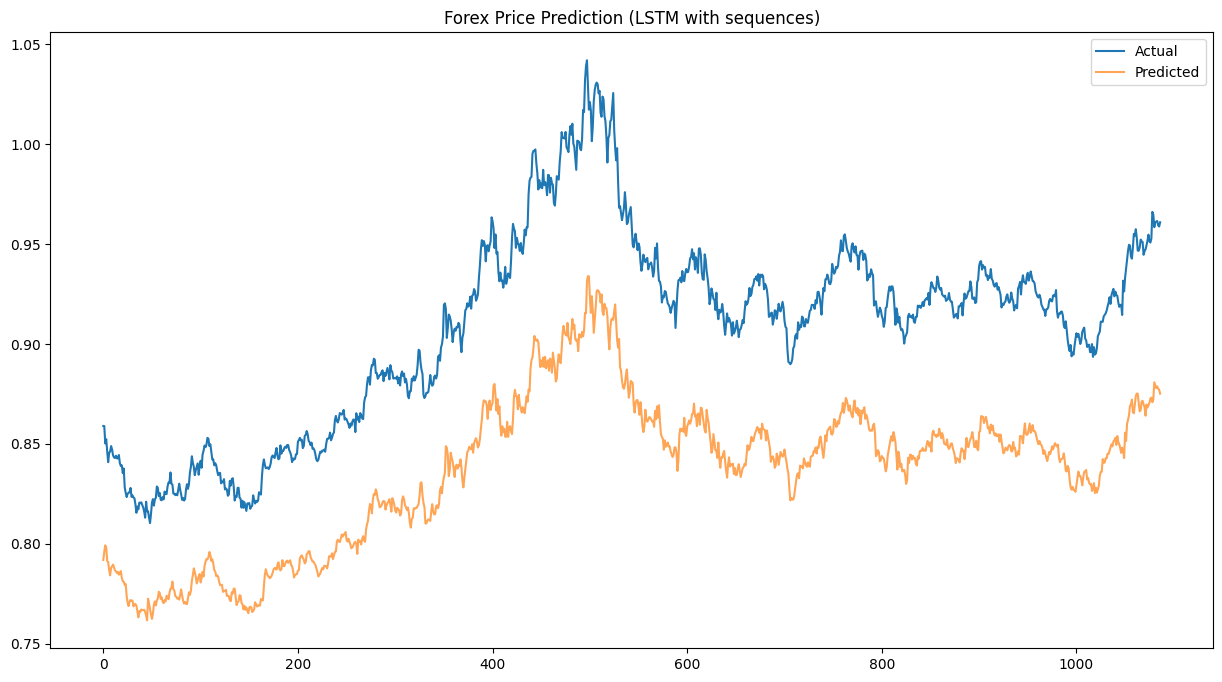

In [72]:
plt.figure(figsize=(15,8))
plt.plot(y_test,label='Actual')
plt.plot(y_pred,label = 'Predicted',alpha=0.7)
plt.title("Forex Price Prediction (LSTM with sequences)")
plt.legend()
plt.show()

### Accuracy metrices

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"MAE: {mae:.4f}, RMSE : {rmse:.4f}")


MAE: 0.0714, RMSE : 0.0725
